## Author: (Cris) Jiangyang Liu

In [2]:
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

Import data

In [3]:
data = pd.read_csv('/data2/GMC/listenbrainz.csv')

/PythonApp/anaconda1/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (4,5,7,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data.head()

,listened_at,user_name,artist_msid,artist_name,artist_mbids,release_msid,release_name,release_mbid,recording_msid,track_name,recording_mbid,tags
0,2017-08-04 10:05:25 UTC,fangsofthefox,f0e45624-7253-4d7d-9d1c-3f1be00188b3,Galapaghost,NaN,02700715-c6d4-41d4-af7e-5f5bf21815e8,NaN,NaN,2ebdab47-6477-4d47-a074-b2de6ff5a1b0,Goodbye (My Visa Arrived),NaN,NaN
1,2017-08-04 10:13:01 UTC,fangsofthefox,75b87461-b9c0-4a54-902a-3f7774e35f61,Modern Baseball,NaN,b06a07a5-fa2c-44d6-8167-7df33704080b,NaN,NaN,c98725cf-08eb-46a8-a5a1-ef3c269072aa,"Fine, Great",f8ad7296-0a71-4044-bc38-cddc2aed54f9,NaN
2,2017-08-05 13:24:34 UTC,fangsofthefox,2eaf3e53-8861-44f2-b40e-2e146c7ee79c,360,NaN,378e31a8-0813-49b7-bb2e-78241811d507,NaN,NaN,e8d048e4-721b-4fe4-910b-7c8ddbbb59ff,You And I,4b6e6561-e189-4b97-81ed-cea789b7b749,NaN
3,2017-08-05 18:45:37 UTC,fangsofthefox,75b87461-b9c0-4a54-902a-3f7774e35f61,Modern Baseball,NaN,6799b7f8-fee0-4e48-9f7b-8e2243cefa2a,NaN,NaN,41943654-bb4c-4a8e-8068-92a64930f6b5,Re-Do,f1702a51-b56b-4c6e-b0e1-ce1e1cab36a0,NaN
4,2017-08-06 10:45:17 UTC,fangsofthefox,60f81b4c-d820-446a-8263-c8891bb8acea,Manchester Orchestra,NaN,b5fe12c3-359c-440c-ac5c-1104c97eab95,NaN,NaN,3ba1d549-b07f-47d5-a68a-1c4c804a56c6,The Wolf,NaN,NaN


Check unique count of each variables

In [6]:
for i in data.columns:
    print i, data[i].nunique()

listened_at 46832544
user_name 650
artist_msid 576500
artist_name 576498
artist_mbids 1109
release_msid 899564
release_name 0
release_mbid 961
recording_msid 7451241
track_name 3577777
recording_mbid 1914760
tags 350


Check number of missing record of each variables

In [8]:
for i in data.columns:
    print i, data[i].isnull().sum()

listened_at 0
user_name 0
artist_msid 0
artist_name 75
artist_mbids 52612030
release_msid 6698104
release_name 52622968
release_mbid 52613442
recording_msid 0
track_name 38
recording_mbid 17697189
tags 52618312


For simplicity , we will mainly use these variables which have less missing records: listened_at ,user_name ,artist_msid , artist_name ,recording_msid ,track_name 

In [7]:
data.shape

(52622968, 12)

## A few Exploratry data analysis

#### Some analysis on user

In [12]:
recording_per_user = data.groupby('user_name').recording_msid.size()

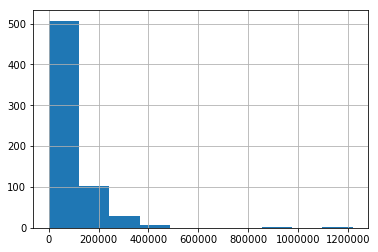

In [15]:
recording_per_user.hist()

In [18]:
recording_per_user.shape

(650,)

In [24]:
recording_per_user[recording_per_user > 400000].shape

(9,)

There are 9 users has over 400K recording. Remove outliers and re-plot the histogram

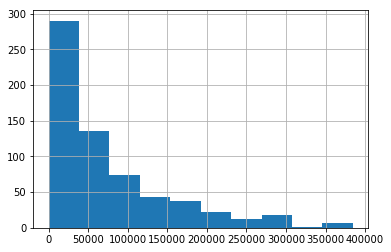

In [25]:
recording_per_user[recording_per_user <= 400000].hist()

Take the logs. It show that majority of users has 1000-100000 recordings

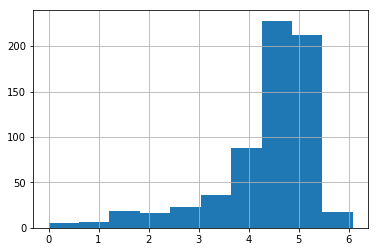

In [63]:
np.log10(recording_per_user).hist()

### Analysis on time

In [65]:
data.listened_at.map(lambda x:x[-3:]).value_counts()

UTC    52622968
Name: listened_at, dtype: int64

It seems that all the time zone is UTC. remove them and transform it into time format

In [73]:
data['listen_hour'] = data.listened_at.map(lambda x:x[11:13])


In [88]:
data['listen_hour'] = data['listen_hour'].astype(int)

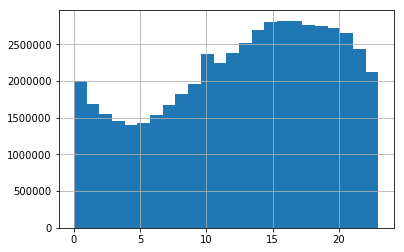

In [78]:
data['listen_hour'].hist(bins = 24)

In [90]:
data.loc[(data['listen_hour']<=20) & (data['listen_hour']>=13)]

,listened_at,user_name,artist_msid,artist_name,artist_mbids,release_msid,release_name,release_mbid,recording_msid,track_name,recording_mbid,tags,listen_hour,time_ind
2,2017-08-05 13:24:34 UTC,fangsofthefox,2eaf3e53-8861-44f2-b40e-2e146c7ee79c,360,NaN,378e31a8-0813-49b7-bb2e-78241811d507,NaN,NaN,e8d048e4-721b-4fe4-910b-7c8ddbbb59ff,You And I,4b6e6561-e189-4b97-81ed-cea789b7b749,NaN,13,
3,2017-08-05 18:45:37 UTC,fangsofthefox,75b87461-b9c0-4a54-902a-3f7774e35f61,Modern Baseball,NaN,6799b7f8-fee0-4e48-9f7b-8e2243cefa2a,NaN,NaN,41943654-bb4c-4a8e-8068-92a64930f6b5,Re-Do,f1702a51-b56b-4c6e-b0e1-ce1e1cab36a0,NaN,18,
5,2017-08-05 15:54:24 UTC,fangsofthefox,2d33faea-68eb-40b9-98d4-b9bf62442d6f,Manic Street Preachers,NaN,93743051-e883-4211-9b13-453f8d8a4747,NaN,NaN,7316561c-fe39-447d-b9c4-0c9bd71bf829,Your Love Alone Is Not Enough - Demo,NaN,NaN,15,
6,2017-08-06 20:23:57 UTC,JonaD92,b603b2bf-c1dc-4274-9d79-f2663ccf635a,emune,NaN,NaN,NaN,NaN,dde2f317-6efb-4bcd-99d5-5e6d0ca45f61,lifted,NaN,NaN,20,
7,2017-08-05 19:32:18 UTC,fangsofthefox,00b06570-c0fa-4158-972c-e8cc65d9ef09,Pet Library,NaN,4323a679-d2af-4938-8c07-8619446d934f,NaN,NaN,4019a95c-e147-4e4f-9fd4-ed27954ac808,There's a Reason People Are Staring,NaN,NaN,19,
8,2017-08-05 13:47:48 UTC,fangsofthefox,2eaf3e53-8861-44f2-b40e-2e146c7ee79c,360,NaN,378e31a8-0813-49b7-bb2e-78241811d507,NaN,NaN,a0fa5174-251e-4af7-a836-76f21992a0d2,Purple Waterfall,NaN,NaN,13,
9,2017-08-06 20:50:34 UTC,JonaD92,d87a907a-9cbd-4e1e-823e-011b5e78870f,Sraw,NaN,NaN,NaN,NaN,06d5df33-39b9-4c59-b48f-dd9940ac440d,Truly Sicknin',NaN,NaN,20,
11,2017-08-03 17:42:41 UTC,fangsofthefox,f0e45624-7253-4d7d-9d1c-3f1be00188b3,Galapaghost,NaN,02700715-c6d4-41d4-af7e-5f5bf21815e8,NaN,NaN,b3023275-b348-448e-881b-439e97aaa2eb,The Greatest Roommate,NaN,NaN,17,
12,2017-08-05 16:01:50 UTC,fangsofthefox,2d33faea-68eb-40b9-98d4-b9bf62442d6f,Manic Street Preachers,NaN,93743051-e883-4211-9b13-453f8d8a4747,NaN,NaN,712bbb65-8550-4463-bc67-871b1d93edfd,The Second Great Depression - Demo,NaN,NaN,16,
14,2017-08-05 14:30:32 UTC,fangsofthefox,2eaf3e53-8861-44f2-b40e-2e146c7ee79c,360,NaN,378e31a8-0813-49b7-bb2e-78241811d507,NaN,NaN,53ec3dad-6792-4d85-bc76-2e96d4672563,Eddie Jones,NaN,NaN,14,


#### the peak hour is afternoon:  2pm - 8pm

In [95]:
data['time_ind'] = ''
data.loc[(data['listen_hour']<=20) & (data['listen_hour']>=13),'time_ind'] = 'afternoon'
data.loc[(data['listen_hour']>=21) | (data['listen_hour']<=4),'time_ind'] = 'evening'
data.loc[(data['listen_hour']>=5) & (data['listen_hour']<=12),'time_ind'] = 'morning'
#data.loc[(data['listen_hour'].astype(int)>=21) & (data['listen_hour'].astype(int)<=4)].time_ind = 'evening'
#data.loc[(data['listen_hour'].astype(int)>=5) & (data['listen_hour'].astype(int)<=12)].time_ind = 'morning'

#### It is clear that user like different kinds of music during different time of day

In [98]:
print data[data['time_ind']=='afternoon'].groupby('tags').size().sort_values(ascending=False).head(5)
print data[data['time_ind']=='evening'].groupby('tags').size().sort_values(ascending=False).head(5)
print data[data['time_ind']=='morning'].groupby('tags').size().sort_values(ascending=False).head(5)

tags
Rock          450
Electronic    159
Anime          78
Oldies         50
Soundtrack     46
dtype: int64
tags
Electronic     181
Rock           152
Rock & Roll     88
Folk Rock       40
Country         37
dtype: int64
tags
Rock          479
Anime         397
Electronic    153
Game           63
Soundtrack     47
dtype: int64


#### Also, users like different artist's music during different time of day

In [99]:
print data[data['time_ind']=='afternoon'].groupby('artist_name').size().sort_values(ascending=False).head(5)
print data[data['time_ind']=='evening'].groupby('artist_name').size().sort_values(ascending=False).head(5)
print data[data['time_ind']=='morning'].groupby('artist_name').size().sort_values(ascending=False).head(5)

artist_name
Radiohead      91514
The Beatles    84525
Pink Floyd     80309
Aphex Twin     58796
Queen          57304
dtype: int64
artist_name
Michael Z. Land    105232
近藤浩治                92820
The Beatles         63913
Radiohead           63444
Pink Floyd          57813
dtype: int64
artist_name
Michael Z. Land    87377
近藤浩治               79024
Radiohead          59599
The Beatles        57538
Pink Floyd         56828
dtype: int64


#### We will use recommender system technique to find similar users, similar artists.

We use number of listen as the metric to see how user like particular artists. 

In [4]:
user_artist = data.groupby(['user_name','artist_msid']).size().unstack(1)

In [5]:
user_artist.head()

artist_msid,00000b6f-d656-4671-8383-b7f6788c8793,000010c5-fd18-4763-a6e8-a4282ef1ae61,00002a2e-5550-423f-9957-a8e3ec027800,00007f1b-db7e-4b75-94c1-aa3f93833a56,00008362-fba7-443f-a084-2b26b60d41e0,0000dd12-2c05-4c24-8d3a-ca2f16a47023,0000ec5c-d094-429a-8e7f-d141b6fc6178,0000f30c-76dc-41ee-84c5-67ba982afb4a,00014c81-faac-4f01-9dff-29a0556d0c83,000162e9-f55f-4170-833f-ea96dc8c20f7,...,fffea68a-ccac-4f38-900b-06f5abbe5ed7,fffee0c5-f6bd-4957-982d-e112fbbbe69c,fffef984-be02-49dd-9de4-32cad1c26385,ffff1450-0d57-4b83-b6d3-b08d36561023,ffff17fe-8524-4e8a-a0a3-abeb4fee10f5,ffff1c77-a501-448d-9451-334037868c0e,ffff48cd-8095-4476-94b9-fcccfb8a4825,ffff6445-27ee-4782-843b-5445ff651b09,ffffbaf3-5b04-4f5f-92a4-5c0068bb484b,fffff7a0-0595-4127-ba31-9c80fb82ce6a
user_name,,,,,,,,,,,,,,,,,,,,,
221bbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2tec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2ywn3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5moufl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7adm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
from sklearn import cross_validation as cv
train_data, test_data = cv.train_test_split(user_artist, test_size=0.25)

/PythonApp/anaconda1/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [29]:
train_data_matrix = train_data.T.values

In [6]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

In [ ]:
import scipy.sparse as sp
from scipy.sparse.linalg import svds

#get SVD components from train matrix. Choose k.
u, s, vt = svds(train_data, k = 20)
s_diag_matrix=np.diag(s)
X_pred = np.dot(np.dot(u, s_diag_matrix), vt)
print 'User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix))
print 'Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix))

In [117]:
from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_data_matrix, metric='cosine')
item_similarity = pairwise_distances(train_data_matrix.T, metric='cosine')

MemoryError: 

We can use similar approaches to find similar recordings using recommendation systems as well. Omitted here given time is limited.

#### Novel idea 1:

It will be good idea to add time into consideration when building recommender system. Specifically, user tends to listen different kinds of music when working, resting, and (prior) sleeping. We can build separate recommender system for different time window.

#### Novel idea 2: 

As a monetization strategy, we can leverage these data, along with recommender system, to provide prospecting list. Specifically, we can corporate with concert organizer by providing them list of users who may be strongly intersted into going to some artist's concert because he/she listen to the artist very often, or artist that similar to the ones he/she likes. Ad title can be something like " You might be interested in Bruno Mars concert in Nov. 15th because you seems love his songs "

### Other ETA: Insights about genres and artists

#### top 20 popular genres

In [47]:
generes_top = data.groupby('tags').size().sort_values(ascending=False)
generes_top.head(20)

tags
Rock                                   1081
Anime                                   505
Electronic                              493
Rock & Roll                             162
Soundtrack                              114
Pop                                      93
Game                                     79
Oldies                                   72
Country                                  61
JPop                                     55
Jazz                                     48
Alternative                              46
Rock And Roll,Merseybeat,Pop             44
Metal                                    42
Big Band,Jazz,Traditional Pop,Vocal      42
Folk Rock                                41
IDM                                      41
Classical                                39
Eye Dee Emm                              39
Hip-Hop                                  36
dtype: int64

#### top 3 artists by each genre. Here we only show the top 5 genre

In [53]:
for i in generes_top.index.values[:5]:
    genre = data[data['tags']==i]
    print 'Genre: ',i
    print genre.groupby('artist_name').size().sort_values(ascending=False).head(3)
    print '\n'

Genre:  Rock
artist_name
Paul McCartney    410
John Lennon       140
The Beatles       126
dtype: int64


Genre:  Anime
artist_name
Walküre                       236
Kitamura Eri                   10
Sheryl Nome starring May'n      8
dtype: int64


Genre:  Electronic
artist_name
Autechre            219
Aphex Twin           79
Boards Of Canada     69
dtype: int64


Genre:  Rock & Roll
artist_name
Elvis Presley         116
The Rolling Stones     46
dtype: int64


Genre:  Soundtrack
artist_name
Elvis Presley     56
Paul McCartney    19
Dr. Dissonance    18
dtype: int64




#### top 3 track by each genre. Here we only show the top 5 genre

In [57]:
for i in generes_top.index.values[:5]:
    genre = data[data['tags']==i]
    print 'Genre: ',i
    print genre.groupby('track_name').size().sort_values(ascending=False).head(3)
    print '\n'

Genre:  Rock
track_name
To Here Knows When    8
Silly Love Songs      7
So Bad                6
dtype: int64


Genre:  Anime
track_name
LOVE! THUNDER GLOW                   12
Onya no Ko☆girl                      11
Ikenai Borderline ~album version~    11
dtype: int64


Genre:  Electronic
track_name
Surripere                   32
Viral Rival (rmxd by Ae)    26
freulaeux                   22
dtype: int64


Genre:  Rock & Roll
track_name
Got A Lot O' Livin' To Do            5
Don't Think Twice, It's All Right    3
Confessin' The Blues                 3
dtype: int64


Genre:  Soundtrack
track_name
God Bless All The Universe    9
Juugodaime to no Deai         4
Track 1 [stereo]              3
dtype: int64




#### top 20 artist ( by recording)

In [62]:
artist_top = data.groupby('artist_name').recording_msid.count().sort_values(ascending=False)
artist_top.head(20)

artist_name
Michael Z. Land          248338
近藤浩治                     226347
Radiohead                214557
The Beatles              205976
Pink Floyd               194950
Aphex Twin               166759
Queen                    142943
Led Zeppelin             125444
Deep Purple              112123
Nine Inch Nails          107169
Daft Punk                105823
David Bowie              100362
John Williams            100333
Boards of Canada          98709
Nightwish                 98273
Metallica                 95578
Red Hot Chili Peppers     94957
Iron Maiden               94341
Muse                      92508
Depeche Mode              89639
Name: recording_msid, dtype: int64